# Visualizating dice trows

1. 6 kauliņi

 Uztaisiet 100 000 garu sarakstu ar 6 metam kauliņu summu. (6 metienu summa vienā mērijumā) 

Saskaitiet šo summu biežumu (izmantojam Counter)

Attēlojam stabiņu( vai kādā citā) diagrammā.

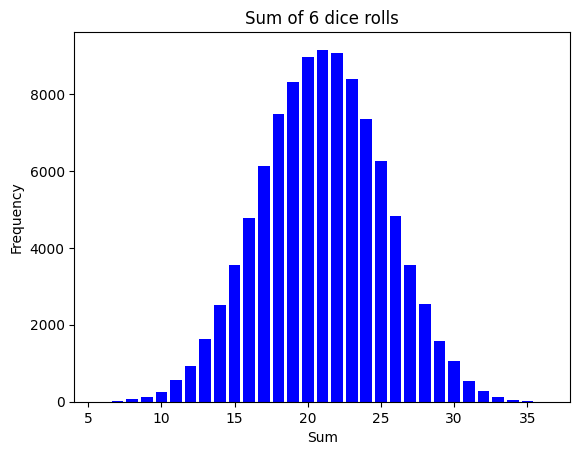

In [ ]:
import random
from collections import Counter
import matplotlib.pyplot as plt
 
summas_list = []
for i in range(100000):
    summa = 0
    for j in range (6):
        summa += int(random.randint(1,6))
    summas_list.append(summa)
 
frequency = Counter(summas_list)
 
# sorted_summas = sorted(frequency.items())
# instead of sorted we could have used most_common() to get the most common sums
sorted_summas = frequency.most_common()
x = []
y = []
for i in sorted_summas:
    x.append(i[0])
    y.append(i[1])
 
plt.bar(x, y, color='blue')
plt.title('Sum of 6 dice rolls')
plt.xlabel('Sum')
plt.ylabel('Frequency')
plt.show()

## Result - normal distribution

Our visualization should look like a normal distribution.

More on wikipedia: [Normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)

![Normal distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Standard_deviation_diagram_micro.svg/500px-Standard_deviation_diagram_micro.svg.png)

In [3]:
# creating a function that returns a list of dice rows
# our get_dice_rolls function takes a number of dice and also how many times we want to roll them
def get_dice_rolls(num_dice=6, num_rolls=100_000, dice_sides=6):
    rolls = []
    for _ in range(num_rolls):
        roll = [random.randint(1, dice_sides) for _ in range(num_dice)]
        rolls.append(sum(roll))
    return rolls

# let's try it on 2 dice and 5 throws
dice_rolls = get_dice_rolls(num_dice=2, num_rolls=5)
print(dice_rolls)

[7, 8, 12, 5, 9]


In [12]:
# let's create a function that takes number of dice number of rolls and number of sides
# it gets list of rolls and plots the histogram of the rolls
def plot_dice_rolls(num_dice=4, 
                    num_rolls=10_000, 
                    dice_sides=6, 
                    color='blue',
                    show=True,
                    save=False):
    rolls = get_dice_rolls(num_dice, num_rolls, dice_sides)
    frequency = Counter(rolls)
    sorted_summas = frequency.most_common()
    # we get a list of tuples (sum, frequency) sorted by frequency
    x = []
    y = []
    for i in sorted_summas:
        x.append(i[0])
        y.append(i[1])
    
    plt.bar(x, y, color=color)
    plt.title(f'Sum of {num_dice} {dice_sides}-sided dice rolls {num_rolls} times')
    plt.xlabel('Sum')
    plt.ylabel('Frequency')

    if save:
        plt.savefig(f'dice_rolls_{num_dice}_{dice_sides}_{num_rolls}.png')
    if show:    
        plt.show()
    # return rolls # we return the rolls so we can use them later if we want to

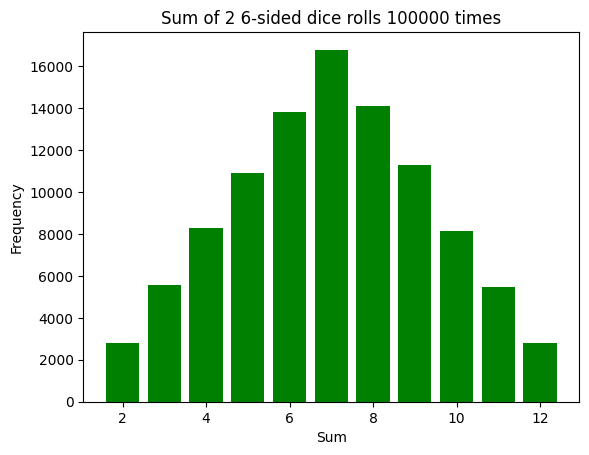

In [13]:
plot_dice_rolls(num_dice=2, num_rolls=100_000, color='green')

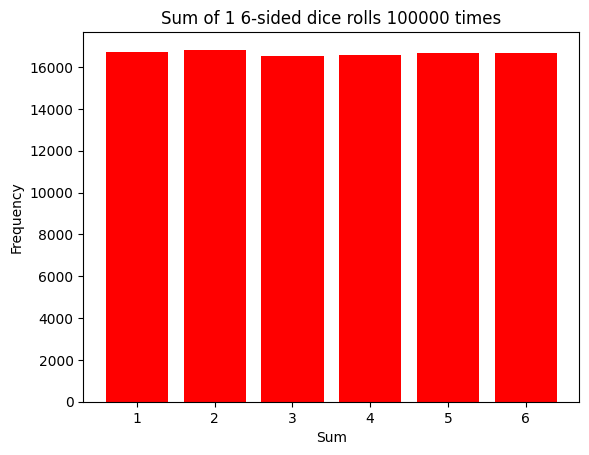

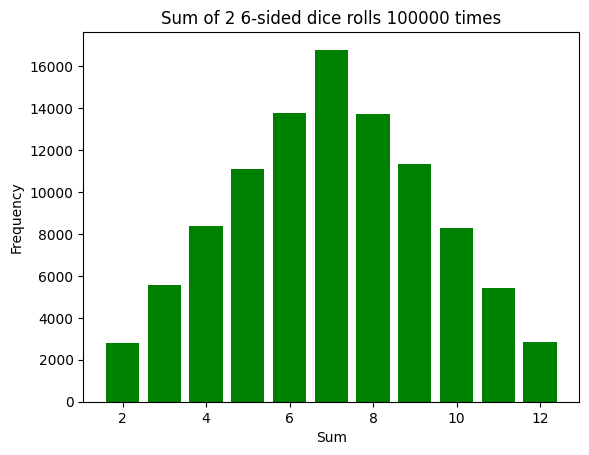

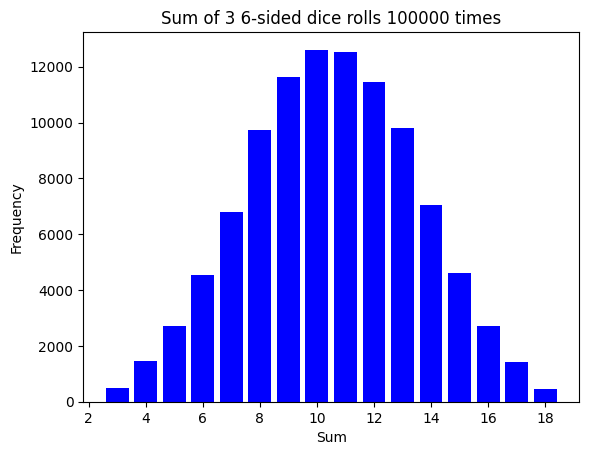

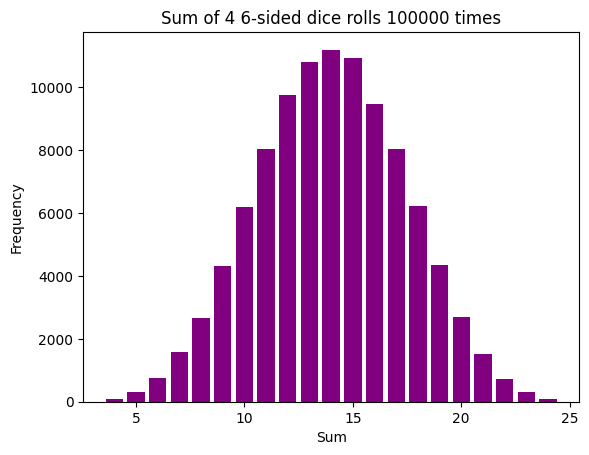

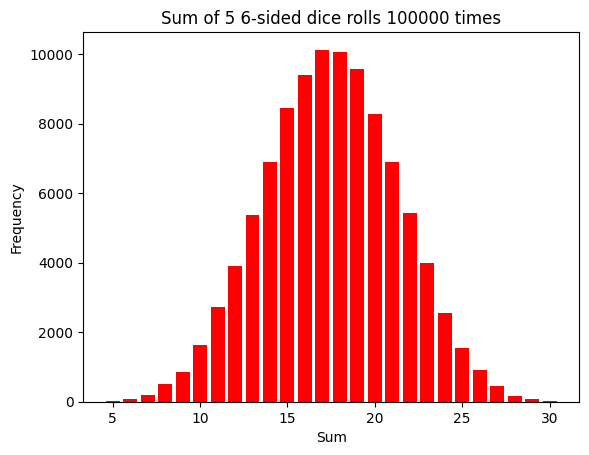

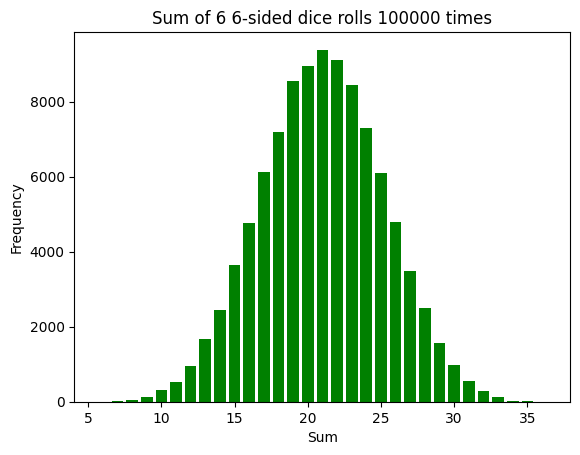

In [14]:
# let's plot histograms of 1,2,3,4,5,6 dice rolls 100000 times
color_list = ['red', 'green', 'blue', 'purple']
# let's cycle through the colors
# we will use cycle to get the colors from the list
from itertools import cycle # standard library
color_cycle = cycle(color_list) # it will keep looping through the colors
for i in range(1, 7):
    plot_dice_rolls(num_dice=i, num_rolls=100_000, color=next(color_cycle), save=True)